# Agrupamiento Regresion Logistica Dataset TITANIC.

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [116]:
#Cargar las librerias necesarias

import pandas as pd #Manejo y analisis de estructura de datos
import numpy as np #Calculo numerico y el analisis de los datos
import seaborn as sns #Creación graficos estadisticos
import matplotlib.pyplot as plt #Creacion de graficos en dos dimensiones

#Cargar librerias para implementar modelo de ciencia de los datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error, mean_absolute_error, r2_score

In [117]:
#Lectura de los df cvs y guardamos en la variable Datos
data = pd.read_csv('D:/UNAD\SEMESTRES/2024 05 QUINTO SEMESTRE/ANÁLISIS DE DATOS - (202016908A_1701)/Tarea 5/Titanic-Dataset.csv')

In [118]:
#Visualizacion de los datos para realizar analisis exploratorio
data.head(50)

,IdPasajero,Sobrevivio,Clase P,Nombre,Sexo,Edad,Numero Hermanos/Conyuges,Numero Padres/Hijos,Ticket,Tarifa,Cabina,Embarcacion
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

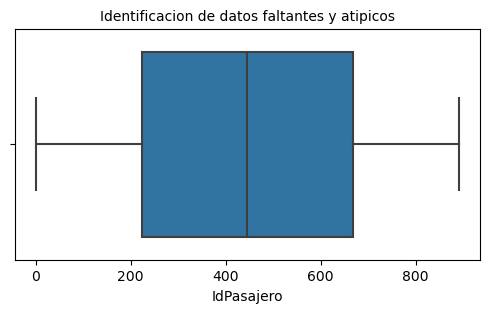

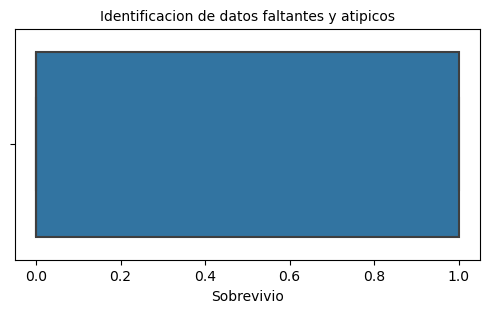

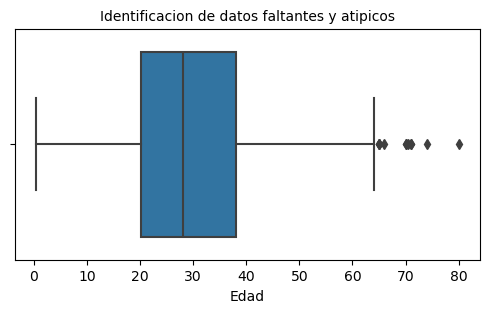

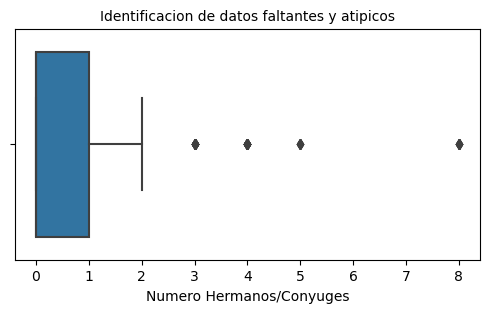

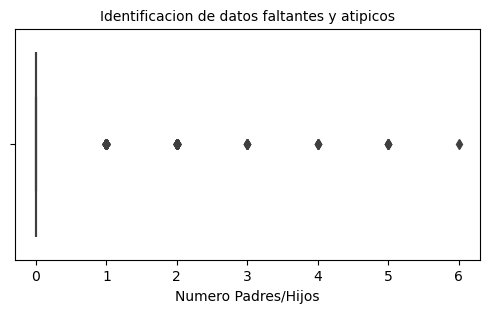

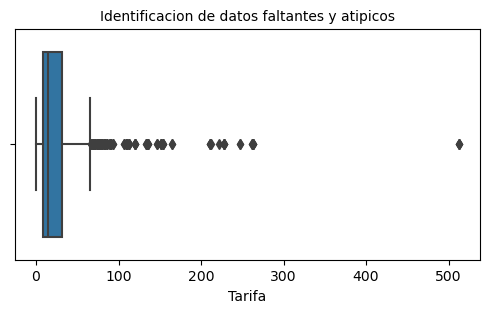

In [119]:
#identificacion de datos faltantes y atipicos

plt.figure(figsize=(6,3))
sns.boxplot(x=data['IdPasajero'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=10)

plt.figure(figsize=(6,3))
sns.boxplot(x=data['Sobrevivio'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=10)

plt.figure(figsize=(6,3))
sns.boxplot(x=data['Edad'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=10)

plt.figure(figsize=(6,3))
sns.boxplot(x=data['Numero Hermanos/Conyuges'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=10)

plt.figure(figsize=(6,3))
sns.boxplot(x=data['Numero Padres/Hijos'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=10)

plt.figure(figsize=(6,3))
sns.boxplot(x=data['Tarifa'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=10)


## 2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [120]:
#Revision de datos faltantes
print("Cantidad de registros con cero en IdPasajero: ",data['IdPasajero'].isin([0]).sum())
print("Cantidad de registros con valores nulos en IdPasajero: ",data['IdPasajero'].isnull().sum())
print("")

print("Cantidad de registros con cero en Sobrevivio: ",data['Sobrevivio'].isin([0]).sum())
print("Cantidad de registros con valores nulos en Sobrevivio: ",data['Sobrevivio'].isnull().sum())
print("")

print("Cantidad de registros con cero en Clase P: ",data['Clase P'].isin([0]).sum())
print("Cantidad de registros con valores nulos en Clase P: ",data['Clase P'].isnull().sum())
print("")

print("Cantidad de registros con cero en Sexo: ",data['Sexo'].isin([0]).sum())
print("Cantidad de registros con valores nulos en Sexo: ",data['Sexo'].isnull().sum())
print("")

print("Cantidad de registros con cero en Edad: ",data['Edad'].isin([0]).sum())
print("Cantidad de registros con valores nulos en Edad: ",data['Edad'].isnull().sum())
print("")

print("Cantidad de registros con cero en Numero Hermanos/Conyuges: ",data['Numero Hermanos/Conyuges'].isin([0]).sum())
print("Cantidad de registros con valores nulos en Numero Hermanos/Conyuges: ",data['Numero Hermanos/Conyuges'].isnull().sum())
print("")

print("Cantidad de registros con cero en Numero Padres/Hijos: ",data['Numero Padres/Hijos'].isin([0]).sum())
print("Cantidad de registros con valores nulos en Numero Padres/Hijos: ",data['Numero Padres/Hijos'].isnull().sum())
print("")

print("Cantidad de registros con cero en Ticket: ",data['Ticket'].isin([0]).sum())
print("Cantidad de registros con valores nulos en Ticket: ",data['Ticket'].isnull().sum())
print("")

print("Cantidad de registros con cero en Tarifa: ",data['Tarifa'].isin([0]).sum())
print("Cantidad de registros con valores nulos en Tarifa: ",data['Tarifa'].isnull().sum())
print("")

print("Cantidad de registros con cero en Cabina: ",data['Cabina'].isin([0]).sum())
print("Cantidad de registros con valores nulos en Cabina: ",data['Cabina'].isnull().sum())
print("")

print("Cantidad de registros con cero en Embarcacion: ",data['Embarcacion'].isin([0]).sum())
print("Cantidad de registros con valores nulos en Embarcacion: ",data['Embarcacion'].isnull().sum())


Cantidad de registros con cero en IdPasajero:  0
Cantidad de registros con valores nulos en IdPasajero:  0

Cantidad de registros con cero en Sobrevivio:  549
Cantidad de registros con valores nulos en Sobrevivio:  0

Cantidad de registros con cero en Clase P:  0
Cantidad de registros con valores nulos en Clase P:  0

Cantidad de registros con cero en Sexo:  0
Cantidad de registros con valores nulos en Sexo:  0

Cantidad de registros con cero en Edad:  0
Cantidad de registros con valores nulos en Edad:  177

Cantidad de registros con cero en Numero Hermanos/Conyuges:  608
Cantidad de registros con valores nulos en Numero Hermanos/Conyuges:  0

Cantidad de registros con cero en Numero Padres/Hijos:  678
Cantidad de registros con valores nulos en Numero Padres/Hijos:  0

Cantidad de registros con cero en Ticket:  0
Cantidad de registros con valores nulos en Ticket:  0

Cantidad de registros con cero en Tarifa:  15
Cantidad de registros con valores nulos en Tarifa:  0

Cantidad de registr

In [121]:
#datos mas comunes de las columnas que contienen texto

dato_comun_cabina = data['Cabina'].mode()[0]
dato_comun_Embarcacion = data['Embarcacion'].mode()[0]

#reemplazamos valores nulos por el valor mas comun
data['Cabina'] = data['Cabina'].fillna(dato_comun_cabina)
data['Embarcacion'] = data['Embarcacion'].fillna(dato_comun_Embarcacion)


#datos mas comunes de las columnas numericas
promedio_edad = data['Edad'].mean()

#Reemplazar todos los valores faltantes numericos con el valor promedio de cada columna

data['Edad'] = data['Edad'].fillna(promedio_edad)
data['Tarifa']=data['Tarifa'].replace(0,data['Tarifa'].mean())

In [122]:
 #Revision nuevamente de datos faltantes
print("Cantidad de registros con cero en IdPasajero: ",data['IdPasajero'].isin([0]).sum())
print("Cantidad de registros con valores nulos en IdPasajero: ",data['IdPasajero'].isnull().sum())
print("")

print("Cantidad de registros con cero en Sobrevivio: ",data['Sobrevivio'].isin([0]).sum())
print("Cantidad de registros con valores nulos en Sobrevivio: ",data['Sobrevivio'].isnull().sum())
print("")

print("Cantidad de registros con cero en Clase P: ",data['Clase P'].isin([0]).sum())
print("Cantidad de registros con valores nulos en Clase P: ",data['Clase P'].isnull().sum())
print("")

print("Cantidad de registros con cero en Sexo: ",data['Sexo'].isin([0]).sum())
print("Cantidad de registros con valores nulos en Sexo: ",data['Sexo'].isnull().sum())
print("")

print("Cantidad de registros con cero en Edad: ",data['Edad'].isin([0]).sum())
print("Cantidad de registros con valores nulos en Edad: ",data['Edad'].isnull().sum())
print("")

print("Cantidad de registros con cero en Numero Hermanos/Conyuges: ",data['Numero Hermanos/Conyuges'].isin([0]).sum())
print("Cantidad de registros con valores nulos en Numero Hermanos/Conyuges: ",data['Numero Hermanos/Conyuges'].isnull().sum())
print("")

print("Cantidad de registros con cero en Numero Padres/Hijos: ",data['Numero Padres/Hijos'].isin([0]).sum())
print("Cantidad de registros con valores nulos en Numero Padres/Hijos: ",data['Numero Padres/Hijos'].isnull().sum())
print("")

print("Cantidad de registros con cero en Ticket: ",data['Ticket'].isin([0]).sum())
print("Cantidad de registros con valores nulos en Ticket: ",data['Ticket'].isnull().sum())
print("")

print("Cantidad de registros con cero en Tarifa: ",data['Tarifa'].isin([0]).sum())
print("Cantidad de registros con valores nulos en Tarifa: ",data['Tarifa'].isnull().sum())
print("")

print("Cantidad de registros con cero en Cabina: ",data['Cabina'].isin([0]).sum())
print("Cantidad de registros con valores nulos en Cabina: ",data['Cabina'].isnull().sum())
print("")

print("Cantidad de registros con cero en Embarcacion: ",data['Embarcacion'].isin([0]).sum())
print("Cantidad de registros con valores nulos en Embarcacion: ",data['Embarcacion'].isnull().sum())

Cantidad de registros con cero en IdPasajero:  0
Cantidad de registros con valores nulos en IdPasajero:  0

Cantidad de registros con cero en Sobrevivio:  549
Cantidad de registros con valores nulos en Sobrevivio:  0

Cantidad de registros con cero en Clase P:  0
Cantidad de registros con valores nulos en Clase P:  0

Cantidad de registros con cero en Sexo:  0
Cantidad de registros con valores nulos en Sexo:  0

Cantidad de registros con cero en Edad:  0
Cantidad de registros con valores nulos en Edad:  0

Cantidad de registros con cero en Numero Hermanos/Conyuges:  608
Cantidad de registros con valores nulos en Numero Hermanos/Conyuges:  0

Cantidad de registros con cero en Numero Padres/Hijos:  678
Cantidad de registros con valores nulos en Numero Padres/Hijos:  0

Cantidad de registros con cero en Ticket:  0
Cantidad de registros con valores nulos en Ticket:  0

Cantidad de registros con cero en Tarifa:  0
Cantidad de registros con valores nulos en Tarifa:  0

Cantidad de registros 

In [123]:
# no se reemplazan los valores en cero de las columnas Numero Hermanos/Conyuges, Numero Padres/Hijos debido a que el tripulante hiba solitario.

Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

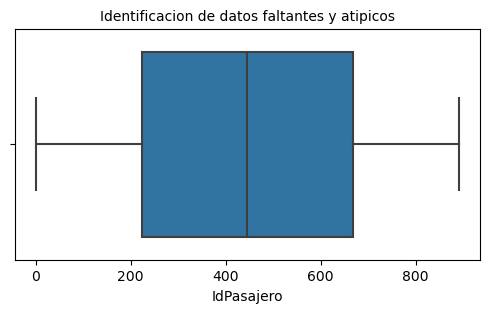

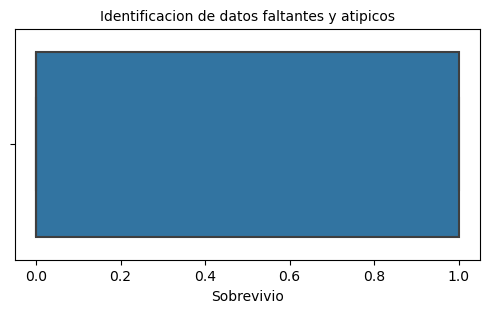

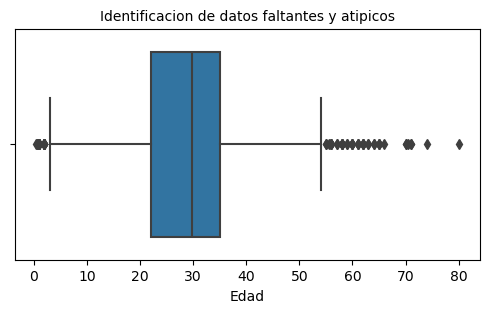

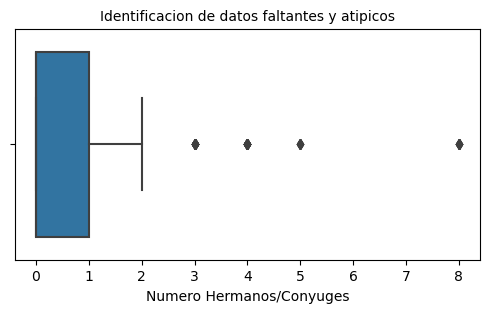

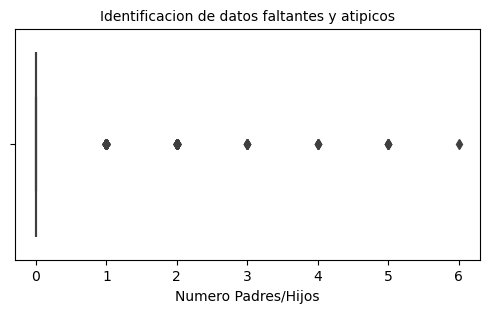

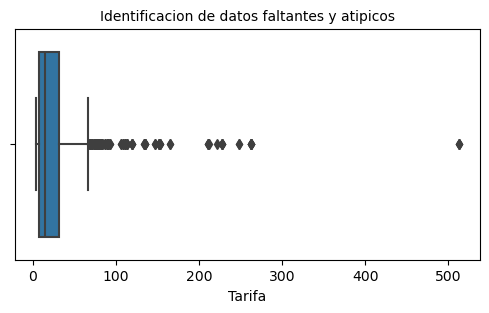

In [124]:
#identificacion de datos faltantes y atipicos

plt.figure(figsize=(6,3))
sns.boxplot(x=data['IdPasajero'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=10)

plt.figure(figsize=(6,3))
sns.boxplot(x=data['Sobrevivio'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=10)

plt.figure(figsize=(6,3))
sns.boxplot(x=data['Edad'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=10)

plt.figure(figsize=(6,3))
sns.boxplot(x=data['Numero Hermanos/Conyuges'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=10)

plt.figure(figsize=(6,3))
sns.boxplot(x=data['Numero Padres/Hijos'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=10)

plt.figure(figsize=(6,3))
sns.boxplot(x=data['Tarifa'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=10)

In [125]:
#Conteo de datos atipicos
edad_minima = 1
edad_maxima = 60

num_herm_min = 0
num_herm_max = 3

num_padr_min = 0
num_padr_max = 2

tarifa_min = 5
tarifa_max = 150

Total_Atipicos_edad =((data['Edad']<edad_minima)|(data['Edad']>edad_maxima)).sum()
print("El total de datos atípicos en edad es {}".format(Total_Atipicos_edad))

Total_Atipicos_num_padr =((data['Numero Hermanos/Conyuges']<num_herm_min)|(data['Numero Hermanos/Conyuges']>num_herm_max)).sum()
print("El total de datos atípicos en Numero Hermanos/Conyuges es {}".format(Total_Atipicos_num_padr))

Total_Atipicos_num_padr =((data['Numero Padres/Hijos']<num_padr_min)|(data['Numero Padres/Hijos']>num_padr_max)).sum()
print("El total de datos atípicos en Numero Padres/Hijos es {}".format(Total_Atipicos_num_padr))

Total_Atipicos_tarifa =((data['Tarifa']<tarifa_min)|(data['Tarifa']>tarifa_max)).sum()
print("El total de datos atípicos en Tarifa es {}".format(Total_Atipicos_tarifa))


El total de datos atípicos en edad es 29
El total de datos atípicos en Numero Hermanos/Conyuges es 30
El total de datos atípicos en Numero Padres/Hijos es 15
El total de datos atípicos en Tarifa es 30


In [126]:
# Filtra Datos Atípicos

data=data[(data['Edad']<edad_maxima)&(data['Edad']>edad_minima)]
data=data[(data['Numero Hermanos/Conyuges']<num_herm_max)&(data['Numero Hermanos/Conyuges']>num_herm_min)]
data=data[(data['Numero Padres/Hijos']<num_padr_max)&(data['Numero Padres/Hijos']>num_padr_min)]
data=data[(data['Tarifa']<tarifa_max)&(data['Tarifa']>tarifa_min)]


In [127]:
#Validar si se removieron datos atipicos
Total_Atipicos_edad =((data['Edad']<edad_minima)|(data['Edad']>edad_maxima)).sum()
print("El total de datos atípicos en edad es {}".format(Total_Atipicos_edad))

Total_Atipicos_num_padr =((data['Numero Hermanos/Conyuges']<num_herm_min)|(data['Numero Hermanos/Conyuges']>num_herm_max)).sum()
print("El total de datos atípicos en Numero Hermanos/Conyuges es {}".format(Total_Atipicos_num_padr))

Total_Atipicos_num_padr =((data['Numero Padres/Hijos']<num_padr_min)|(data['Numero Padres/Hijos']>num_padr_max)).sum()
print("El total de datos atípicos en Numero Padres/Hijos es {}".format(Total_Atipicos_num_padr))

Total_Atipicos_tarifa =((data['Tarifa']<tarifa_min)|(data['Tarifa']>tarifa_max)).sum()
print("El total de datos atípicos en Tarifa es {}".format(Total_Atipicos_tarifa))

El total de datos atípicos en edad es 0
El total de datos atípicos en Numero Hermanos/Conyuges es 0
El total de datos atípicos en Numero Padres/Hijos es 0
El total de datos atípicos en Tarifa es 0


In [128]:
#Revisión del tipo de datos y datos faltantes

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 10 to 871
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   IdPasajero                54 non-null     int64  
 1   Sobrevivio                54 non-null     int64  
 2   Clase P                   54 non-null     int64  
 3   Nombre                    54 non-null     object 
 4   Sexo                      54 non-null     object 
 5   Edad                      54 non-null     float64
 6   Numero Hermanos/Conyuges  54 non-null     int64  
 7   Numero Padres/Hijos       54 non-null     int64  
 8   Ticket                    54 non-null     object 
 9   Tarifa                    54 non-null     float64
 10  Cabina                    54 non-null     object 
 11  Embarcacion               54 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 5.5+ KB


In [129]:
# Reemplazar todos genero en la columna.

data['Sexo']=data['Sexo'].replace('male',1) #se reemplaza musculino por el numero 1
data['Sexo']=data['Sexo'].replace('female',0) #se reemplaza femenino por el numero 2

In [130]:
# Realizamos lectura de los Datos nuevamente

data.head(10)

,IdPasajero,Sobrevivio,Clase P,Nombre,Sexo,Edad,Numero Hermanos/Conyuges,Numero Padres/Hijos,Ticket,Tarifa,Cabina,Embarcacion
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.000000,1,1,PP 9549,16.7000,G6,S
65,66,1,3,"Moubarek, Master. Gerios",1,29.699118,1,1,2661,15.2458,B96 B98,C
128,129,1,3,"Peter, Miss. Anna",0,29.699118,1,1,2668,22.3583,F E69,C
145,146,0,2,"Nicholls, Mr. Joseph Charles",1,19.000000,1,1,C.A. 33112,36.7500,B96 B98,S
175,176,0,3,"Klasen, Mr. Klas Albin",1,18.000000,1,1,350404,7.8542,B96 B98,S
188,189,0,3,"Bourke, Mr. John",1,40.000000,1,1,364849,15.5000,B96 B98,Q
193,194,1,2,"Navratil, Master. Michel M",1,3.000000,1,1,230080,26.0000,F2,S
248,249,1,1,"Beckwith, Mr. Richard Leonard",1,37.000000,1,1,11751,52.5542,D35,S
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",0,29.000000,1,1,347054,10.4625,G6,S
262,263,0,1,"Taussig, Mr. Emil",1,52.000000,1,1,110413,79.6500,E67,S


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

Características de interes para el agrupamiento:
* IdPasajero
* Sobrevivio
* Clase P
* Sexo
* Tarifa 00)

In [131]:
# Filtrar columnas del modelo 

data = data[["IdPasajero","Sobrevivio","Clase P","Sexo","Tarifa"]]

In [132]:
# Revisión de los datos de las variables objetivo

data.head(20)

,IdPasajero,Sobrevivio,Clase P,Sexo,Tarifa
10,11,1,3,0,16.7000
65,66,1,3,1,15.2458
128,129,1,3,0,22.3583
145,146,0,2,1,36.7500
175,176,0,3,1,7.8542
188,189,0,3,1,15.5000
193,194,1,2,1,26.0000
248,249,1,1,1,52.5542
251,252,0,3,0,10.4625
262,263,0,1,1,79.6500


In [133]:
#seleccionar variable dependiente

#Total Sobrevivio
data['Sobrevivio'].value_counts()

Sobrevivio
1    32
0    22
Name: count, dtype: int64

In [134]:
data['Sobrevivio'].head(20)

10     1
65     1
128    1
145    0
175    0
188    0
193    1
248    1
251    0
262    0
279    1
312    0
314    0
319    1
323    1
328    1
340    1
348    1
352    0
407    1
Name: Sobrevivio, dtype: int64

## 4. Dividir el dataset en Train y Test para evaluar correctamente el model.

In [135]:
#Porcentaje de datos para entrenamiento (train)=75% , y para prueba (test) = 25%

#Se crean variables Xdatos y Ydatos para almacenar la información de entrenamiento

Xdata = data.drop('Sobrevivio',axis=1)#Se suben los datos de train sin la columna Sobrevivio
Ydata = data['Sobrevivio']#Se suben los datos de train con los datos de la columna Sobrevivio

#division del conjunto de datos en dos bloques uno de entrenamiento y el otro de prueba (train and test)
Xdata_train, Xdata_test, Ydata_train, Ydata_test = train_test_split(Xdata, Ydata, test_size=0.25, stratify = Ydata, random_state=0)

In [136]:
print(Xdata_train)

     IdPasajero  Clase P  Sexo    Tarifa
750         751        2     0   23.0000
65           66        3     1   15.2458
616         617        3     1   14.4000
600         601        2     0   27.0000
869         870        3     1   11.1333
128         129        3     0   22.3583
423         424        3     0   14.4000
835         836        1     0   83.1583
10           11        3     0   16.7000
820         821        1     0   93.5000
448         449        3     0   19.2583
312         313        2     0   26.0000
319         320        1     0  134.5000
193         194        2     1   26.0000
657         658        3     0   15.5000
416         417        2     0   32.5000
188         189        3     1   15.5000
622         623        3     1   15.7417
801         802        2     0   26.2500
670         671        2     0   39.0000
348         349        3     1   15.9000
698         699        1     1  110.8833
262         263        1     1   79.6500
871         872 

In [137]:
print(Ydata_train)

750    1
65     1
616    0
600    1
869    1
128    1
423    0
835    1
10     1
820    1
448    1
312    0
319    1
193    1
657    0
416    1
188    0
622    1
801    1
670    1
348    1
698    0
262    0
871    1
532    0
595    0
248    1
314    0
799    0
558    1
529    0
618    1
323    1
175    0
424    0
407    1
852    0
489    1
530    1
817    0
Name: Sobrevivio, dtype: int64


## 5.Entrenar el modelo configurando los diferentes hiperparámetros.

In [138]:
#construir modelo de regresión Logistica
modelo_regresion_logistic = LogisticRegression(solver="liblinear")#Liblinear = libreria para resolver problemas lineales de clasificacion y regresion
modelo_regresion_logistic.fit(Xdata_train,Ydata_train)

#crear modelo de prediccion
Prediccion = modelo_regresion_logistic.predict(Xdata_test)#La funcion Predict predice los valores a partir del conjunto de datos de validación

In [139]:
print(Ydata_test)

251    0
549    1
709    1
279    1
580    1
340    1
746    0
352    0
328    1
548    0
581    1
440    1
145    0
637    0
Name: Sobrevivio, dtype: int64


In [140]:
print(Prediccion)

[1 0 0 1 1 0 0 0 1 0 1 1 1 0]


## 6.Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [141]:
#Desempeño del modelo de regresion
print(classification_report(Ydata_test, Prediccion))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.71      0.62      0.67         8

    accuracy                           0.64        14
   macro avg       0.64      0.65      0.64        14
weighted avg       0.65      0.64      0.64        14



## 7.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

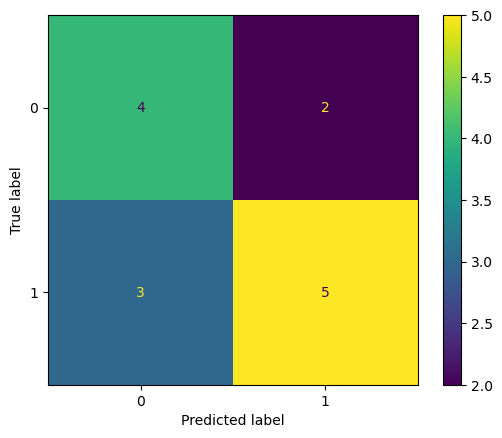

In [142]:
#matrix de confusion del modelo
cm = confusion_matrix(Ydata_test, Prediccion)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

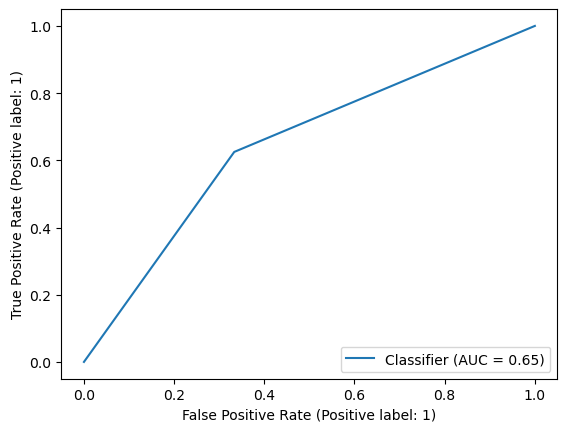

In [143]:
#curva de precision del modelo
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Ydata_test,Prediccion)
plt.show()

## 7. Interpretar, analizar y documentar los resultados obtenidos